<a href="https://colab.research.google.com/github/Jaq-code/MVP-Analise-de-Dados/blob/main/MVP_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Jaqueline Paciêlo Dantas

**Matrícula:** 4052025000151

**Dataset:** [Wine Quality df](https://archive.ics.uci.edu/df/186/wine+quality)


# Descrição do Problema

Este projeto tem como foco a análise e a previsão da qualidade de vinhos tintos e brancos a partir de suas características físico-químicas, como acidez, teor alcoólico, pH e densidade. Cada amostra possui uma nota de qualidade atribuída por especialistas, variando de 0 a 10.

## Hipóteses do Problema


1. Qual a distribuição de densidade por tipo de vinho?  
2. Como a quantidade média de açúcar residual varia de acordo com a qualidade e o tipo de vinho?  
3. É possível diferenciar o tipo de vinho com base em álcool e densidade?


## Tipo de Problema

Esta análise é do tipo supervisionada, porque usamos a nota da qualidade do vinho para entender como suas características influenciam essa qualidade e para prever a qualidade com base nessas informações.

## Atributos do dataframe

O conjunto de dados **winequality-red** e **winequality-white**  possuem 12 colunas, com as seguintes descrições:  
    
- fixed acidity (acidez fixa)
- volatile acidity (acidez volátil)
- citric acid (ácido cítrico)
- residual sugar (açúcar residual)
- chlorides (cloretos)
- free sulfur dioxide (dióxido de enxofre livre)
- total sulfur dioxide (dióxido de enxofre total)
- density (densidade)
- pH (pH)
- sulphates (sulfatos)
- alcohol (álcool)
- quality (qualidade)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do df Iris.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
#URLs de importação dos dados
url_VinhoTinto =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_VinhoBranco =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

label_atributos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type'
]

#lendo os arquivos .csv
df_VinhoTinto = pd.read_csv(url_VinhoTinto, delimiter=';')
df_VinhoBranco = pd.read_csv(url_VinhoBranco, delimiter=';')


# Adicionando a coluna tipo
df_VinhoTinto['tipo'] = 'tinto'
df_VinhoBranco['tipo'] = 'branco'

# Concatenando os dois datasets
df_vinhos = pd.concat([df_VinhoTinto, df_VinhoBranco], ignore_index=True)



In [42]:
#Mostrando as linhas do df VinhoTinto
df_VinhoTinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


In [43]:
#Mostrando as linhas do df VinhoBranco
df_VinhoBranco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,branco
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,branco
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,branco
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,branco
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,branco


# Análise de Dados

Nesta etapa de análise exploratória, estou investigando o df Wine Quality para entender melhor como as variáveis se comportam e quais delas influenciam na qualidade dos vinhos. A ideia é observar a distribuição dos dados, identificar possíveis padrões e relações entre as variáveis, além de detectar outliers.

Tipo de dados - Vinho Branco

In [44]:
print("Tipo de dados por Coluna")
df_VinhoBranco.info()

Tipo de dados por Coluna
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  tipo                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [45]:
print("Tipo de dados por Coluna")
df_VinhoTinto.info()

Tipo de dados por Coluna
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  tipo                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


## Estatísticas Descritivas


In [46]:
df_vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


O gráfico em barras mostra a média de açucar dos vinhos branco e tinto por nível de qualidade.

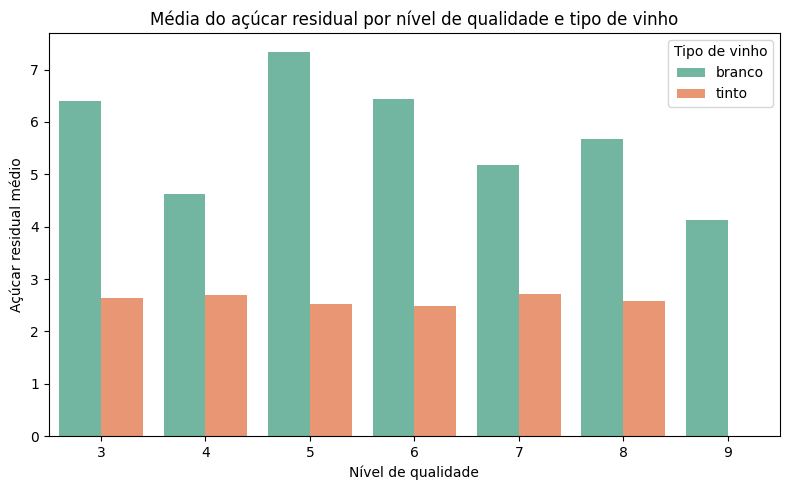

In [47]:
# Calcular média do açúcar residual por tipo e qualidade
media_acucar = df_vinhos.groupby(['tipo', 'quality'])['residual sugar'].mean().reset_index()

# Gráfico de barras com separação por tipo
plt.figure(figsize=(8, 5))
sns.barplot(x='quality', y='residual sugar', hue='tipo', data=media_acucar, palette='Set2')
plt.title('Média do açúcar residual por nível de qualidade e tipo de vinho')
plt.xlabel('Nível de qualidade')
plt.ylabel('Açúcar residual médio')
plt.legend(title='Tipo de vinho')
plt.tight_layout()
plt.show()

Este gráfico apresenta um heatmap de correlação entre os principais atributos físico-químicos do vinho: Álcool, Densidade, pH e a Qualidade avaliada sensorialmente.

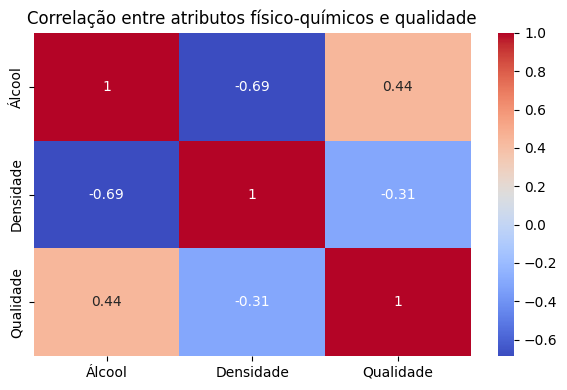

In [48]:

# Selecionando as colunas alcohol, density, pH, quality, tipo
colunas = ['alcohol', 'density', 'quality']
df = df_vinhos[colunas]
df_colunasRenomeadas = df.rename(columns={
    'alcohol': 'Álcool',
    'density': 'Densidade',
    'quality': 'Qualidade'
})
# Heatmap de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(df_colunasRenomeadas.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre atributos físico-químicos e qualidade')
plt.tight_layout()
plt.show()

Distribuição do pH por nível de qualidade do vinho

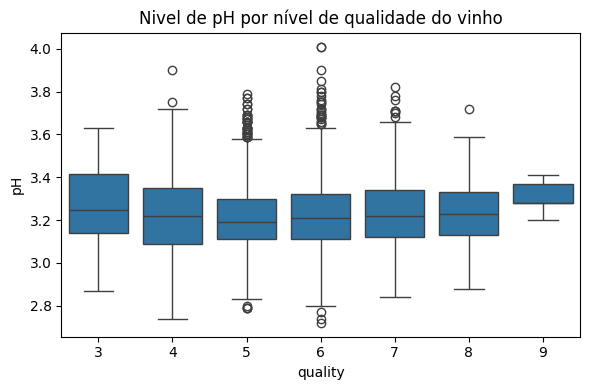

In [49]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_vinhos, x='quality', y='pH')
plt.title(f'Nivel de pH por nível de qualidade do vinho')
plt.tight_layout()
plt.show()

Densidade por tipo de vinho

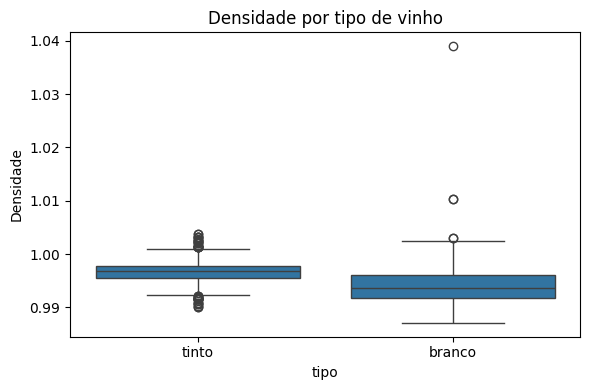

In [50]:
# Boxplots - Densidade por tipo de vinho
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_vinhos, x='tipo', y='density')
plt.title(f'Densidade por tipo de vinho')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

Este gráfico é um pairplot que compara os vinhos tintos e brancos com base em duas variáveis físico-químicas: álcool e densidade.

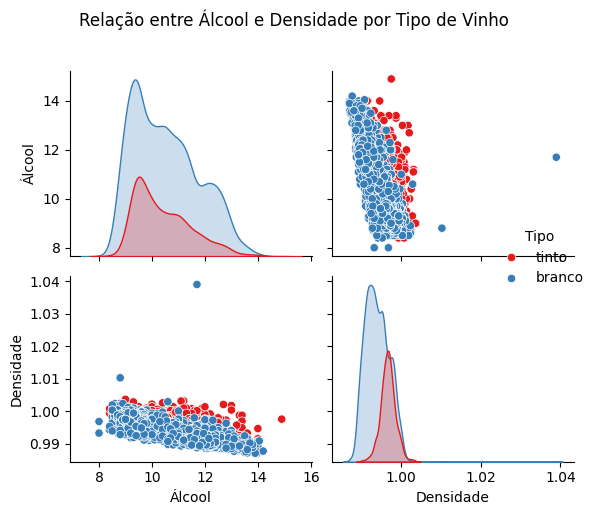

In [51]:
df_ad = df_vinhos.rename(columns={
    'alcohol': 'Álcool',
    'density': 'Densidade',
    'tipo': 'Tipo'
})
sns.pairplot(df_ad, vars=['Álcool', 'Densidade'], hue='Tipo', palette='Set1')
plt.suptitle('Relação entre Álcool e Densidade por Tipo de Vinho', y=1.02)
plt.tight_layout()
plt.show()


# Pré-Processamento de Dados



In [52]:
df_VinhoTinto.info() #Total de linhas: 1599
df_VinhoBranco.info() #Total de linhas: 4898

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  tipo                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries,

Removendo outliers (se houver)

In [53]:
Q1 = df_VinhoTinto['density'].quantile(0.25)
Q3 = df_VinhoTinto['density'].quantile(0.75)
IQR = Q3 - Q1
df_Tinto = df_VinhoTinto[(df_VinhoTinto['density'] >= Q1 - 1.5 * IQR) & (df_VinhoTinto['density'] <= Q3 + 1.5 * IQR)]

In [54]:
Q1 = df_VinhoBranco['density'].quantile(0.25)
Q3 = df_VinhoBranco['density'].quantile(0.75)
IQR = Q3 - Q1
df_Branco = df_VinhoBranco[(df_VinhoBranco['density'] >= Q1 - 1.5 * IQR) & (df_VinhoBranco['density'] <= Q3 + 1.5 * IQR)]

In [55]:
df_vinhosTratado = pd.concat([df_Tinto, df_Branco], ignore_index=True)

Tinto   
Linhas antes: 1599  
Depois: 1554
    
Branco  
Linhas antes: 4898  
Depois: 4893

In [56]:
df_Tinto.info() #linhas após a remoção: 1554
df_Branco.info() #linhas após a remoção: 4893

<class 'pandas.core.frame.DataFrame'>
Index: 1554 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1554 non-null   float64
 1   volatile acidity      1554 non-null   float64
 2   citric acid           1554 non-null   float64
 3   residual sugar        1554 non-null   float64
 4   chlorides             1554 non-null   float64
 5   free sulfur dioxide   1554 non-null   float64
 6   total sulfur dioxide  1554 non-null   float64
 7   density               1554 non-null   float64
 8   pH                    1554 non-null   float64
 9   sulphates             1554 non-null   float64
 10  alcohol               1554 non-null   float64
 11  quality               1554 non-null   int64  
 12  tipo                  1554 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 170.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4893 entries, 0 to 4897

## Padronização

## Divisão em treino e teste

Após o pré-processamento dos dados (remoção de outliers, normalização/padronização, tratamento de valores ausentes), os dados foram divididos em conjunto de treino e teste. Essa divisão permite avaliar a performance do modelo com dados que ele nunca viu antes, evitando overfitting.


Transforma os dados para que tenham média = 0 e desvio padrão = 1

In [57]:
#Colunas para padronização
colunas = ['alcohol', 'density', 'pH', 'residual sugar']

#copia do dataframe tratado
df_padronizado = df_vinhosTratado.copy()

In [58]:
#Define X e y
X = df_vinhosTratado[colunas]
y = df_vinhosTratado['quality']

In [59]:
# Inicia o scaler e padroniza X
scaler = StandardScaler()
X_Padronizado = scaler.fit_transform(X)

# Converte X padronizado de volta para DataFrame
X_Padronizado = pd.DataFrame(X_Padronizado, columns=colunas)

# Junta com y para visualização e análise
df_padronizado = X_Padronizado.copy()
df_padronizado['quality'] = y.values

In [60]:
# Exibe as 5 primeiras linhas
print("Primeiras 5 linhas do dataset padronizado:")
print(df_padronizado.head())

Primeiras 5 linhas do dataset padronizado:
    alcohol   density        pH  residual sugar  quality
0 -0.915830  1.081401  1.826347       -0.755306        5
1 -0.578017  0.736441 -0.113391       -0.605288        5
2 -0.578017  0.805433  0.262042       -0.669582        5
3 -0.578017  1.150393 -0.363680       -0.755306        6
4 -0.915830  1.081401  1.826347       -0.755306        5


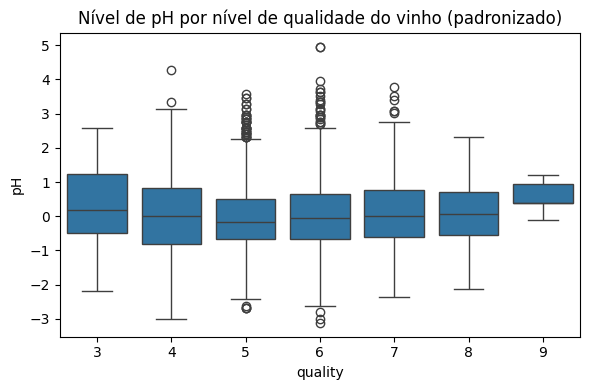

In [61]:
# Gráfico boxplot do pH padronizado por qualidade
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_padronizado, x='quality', y='pH')
plt.title('Nível de pH por nível de qualidade do vinho (padronizado)')
plt.tight_layout()
plt.show()

## Tratamento de valores Nulos

In [62]:
# Verificando a presença de valores Nulos
print("Valores nulos no dataset Iris:")
df_vinhos.isnull().sum()

Valores nulos no dataset Iris:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Conclusão


1. Qual a distribuição de densidade por tipo de vinho?  
Utilizei boxplots para analisar a distribuição da densidade com base no tipo de vinho (tinto ou branco), após combinar ambos os conjuntos em um único DataFrame df_vinhos.
Com ele, foi possível observar que os vinhos brancos tendem a apresentar densidade menor do que os tintos.     

2. Como a quantidade média de açúcar residual varia de acordo com a qualidade e o tipo de vinho?
A análise do gráfico de barras mostrou que a média do açúcar residual varia conforme a qualidade e o tipo do vinho. Vinhos brancos geralmente apresentam níveis mais altos de açúcar residual do que vinhos tintos. Os vinhos tintos possuem quase a mesma média de açucar independentes do nível de qualidade.


3. É possível diferenciar o tipo de vinho com base em álcool e densidade?
Sim, a análise gráfica evidenciou que vinhos tintos e brancos possuem padrões distintos em relação ao teor alcoólico e densidade. Vinhos brancos tendem a apresentar maior densidade.